<h1 align="center"> Credit card Fraud Detector </h1>


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [5]:
mount_path = '/content/drive'
folder_path = mount_path + '/MyDrive/Colab Notebooks/4К1Т'

from google.colab import drive
drive.mount(mount_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# загрузка данных и структура данных
df=pd.read_csv(folder_path + '/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Небольшой описательный анализ.

In [7]:
# анализ данных
data = df
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Проверим на наличие пропусков в данных.

In [8]:
# проверка наличия пропусков в данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


Пропусков нет

Выведем названия столбцов.

In [9]:
# названия столбцов
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

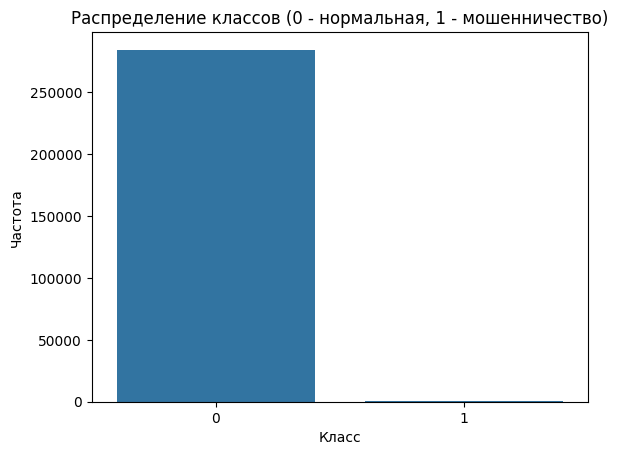

In [10]:
# Визуализация распределения классов
sns.countplot(x='Class', data=data)
plt.title('Распределение классов (0 - нормальная, 1 - мошенничество)')
plt.xlabel('Класс')
plt.ylabel('Частота')
plt.show()

Еще раз оценим отношение классов целевой переменной.

In [11]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [12]:
counts = df['Class'].value_counts()

def Percent(val1, val2):
  return round(val1/val2*100, 2)

In [13]:
#  вывод отношения классов целевой переменной, но записанный через f строку

n_trans = Percent(counts[1], counts[1]+counts[0])
f_trans = Percent(counts[0], counts[1]+counts[0])

print(f'Обычные транзакции составляют {n_trans}% данных')
print(f'Мошеннические транзакции составляют {f_trans}% данных')

Обычные транзакции составляют 0.17% данных
Мошеннические транзакции составляют 99.83% данных


Построим распределения по суммам и времени транзакций.

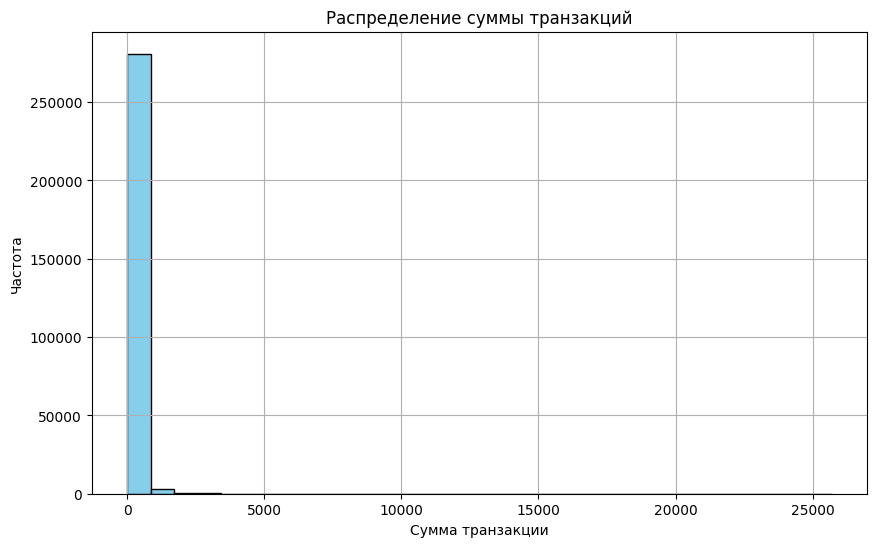

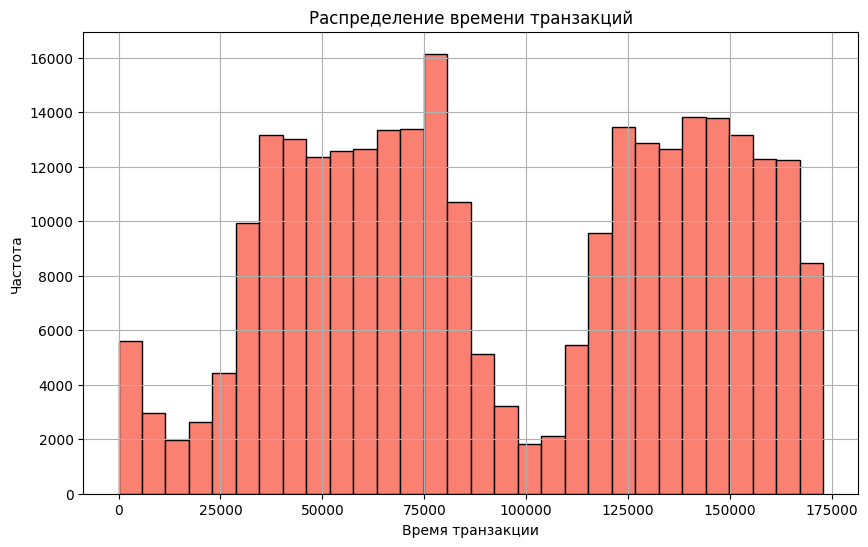

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение суммы транзакций')
plt.xlabel('Сумма транзакции')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Time'], bins=30, color='salmon', edgecolor='black')
plt.title('Распределение времени транзакций')
plt.xlabel('Время транзакции')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

### Масштабирование


In [15]:
from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


# Посмотрим, какие типы данных возвращаются после разделения:
rt_tmp = original_Xtrain['Amount']
print (f'Тип данных original_Xtrain["Amount"] {type(rt_tmp)}')
print (f'Тип данных original_Xtrain["Amount"].values {type(rt_tmp.values)}')
print (f'Данные original_Xtrain["Amount"].values {rt_tmp.values}')
print (f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1) {type(rt_tmp.values.reshape(-1,1))}')
print (f'Данные original_Xtrain["Amount"].values.reshape(-1,1) \n{rt_tmp.values.reshape(-1,1)} \n')

# вот последнее представление - как раз то, что нужно для RobustScaler . Преобразовываем так все нужные столбцы.

original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Тип данных original_Xtrain["Amount"] <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values [  9.99  45.9   11.99 ...   3.94   1.   113.  ]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1) <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1) 
[[  9.99]
 [ 45.9 ]
 [ 11.99]
 ...
 [  3.94]
 [  1.  ]
 [113.  ]] 

Распределение классов: 

Обучающий набор: [0.99827075 0.00172925]
Тестовый набор: [0.99827955 0.00172045]


## Метод Random Under-Sampling


In [16]:
data = data.sample(frac=1)

fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492] # берем последние 492 транзакции

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
111988,72467.0,-0.912768,1.374494,0.810433,0.699139,0.310799,-0.267106,0.367997,0.213370,-0.793112,...,0.080762,0.157643,-0.095482,-0.421478,-0.059212,-0.387317,-0.208946,0.075233,2.49,0
42473,41116.0,-3.600544,4.519047,-6.340884,6.214767,-5.829558,-2.478095,-9.938412,2.830086,-5.659162,...,2.263770,0.620749,-0.094069,0.536719,0.398142,0.008277,2.053524,0.835749,3.79,1
77520,57087.0,1.388049,-0.257519,-0.162286,-0.843386,-0.272063,-0.587799,-0.143216,-0.190615,-1.595424,...,0.275701,0.816182,-0.150940,0.092694,0.735274,-0.075052,-0.005928,-0.011347,1.00,0
230076,146179.0,-0.067672,4.251181,-6.540388,7.283657,0.513541,-2.635066,-1.865911,0.780272,-3.868248,...,0.415437,-0.469938,0.007128,-0.388147,-0.493398,0.466468,0.566370,0.262990,0.77,1
44223,41851.0,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,...,-2.182692,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,139.90,1


In [17]:
df.to_csv(folder_path + "/creditcard_full.csv")

In [18]:
new_df.shape

(984, 31)

Распределение классов в подвыборке


Text(0.5, 1.0, 'Распределение классов')

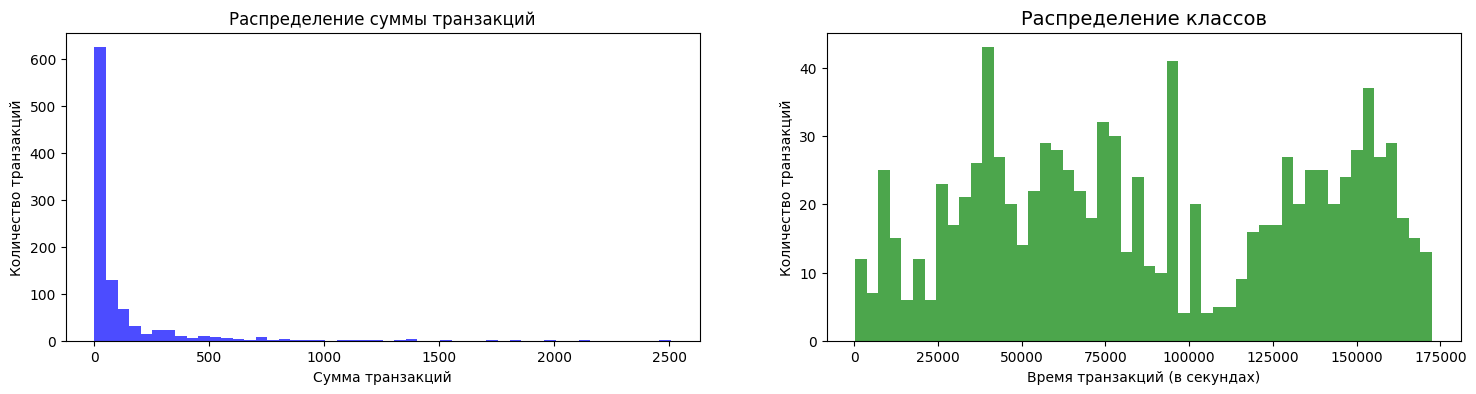

In [19]:
print('Распределение классов в подвыборке')


# проверяем снова распределение целевой переменной
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = new_df['Amount']
time_val = new_df['Time']

# ВАШ КОД ЗДЕСЬ # строим график распределения суммы транзакций
# График распределения суммы транзакций
ax[0].hist(amount_val, bins=50, color='blue', alpha=0.7)
ax[0].set_title('Распределение суммы транзакций')
ax[0].set_xlabel('Сумма транзакций')
ax[0].set_ylabel('Количество транзакций')

# ВАШ КОД ЗДЕСЬ # строим график распределения времени транзакций
ax[1].hist(time_val, bins=50, color='green', alpha=0.7)
ax[1].set_title('Распределение времени транзакций')
ax[1].set_xlabel('Время транзакций (в секундах)')
ax[1].set_ylabel('Количество транзакций')
plt.title('Распределение классов', fontsize=14)


### Матрица корреляций


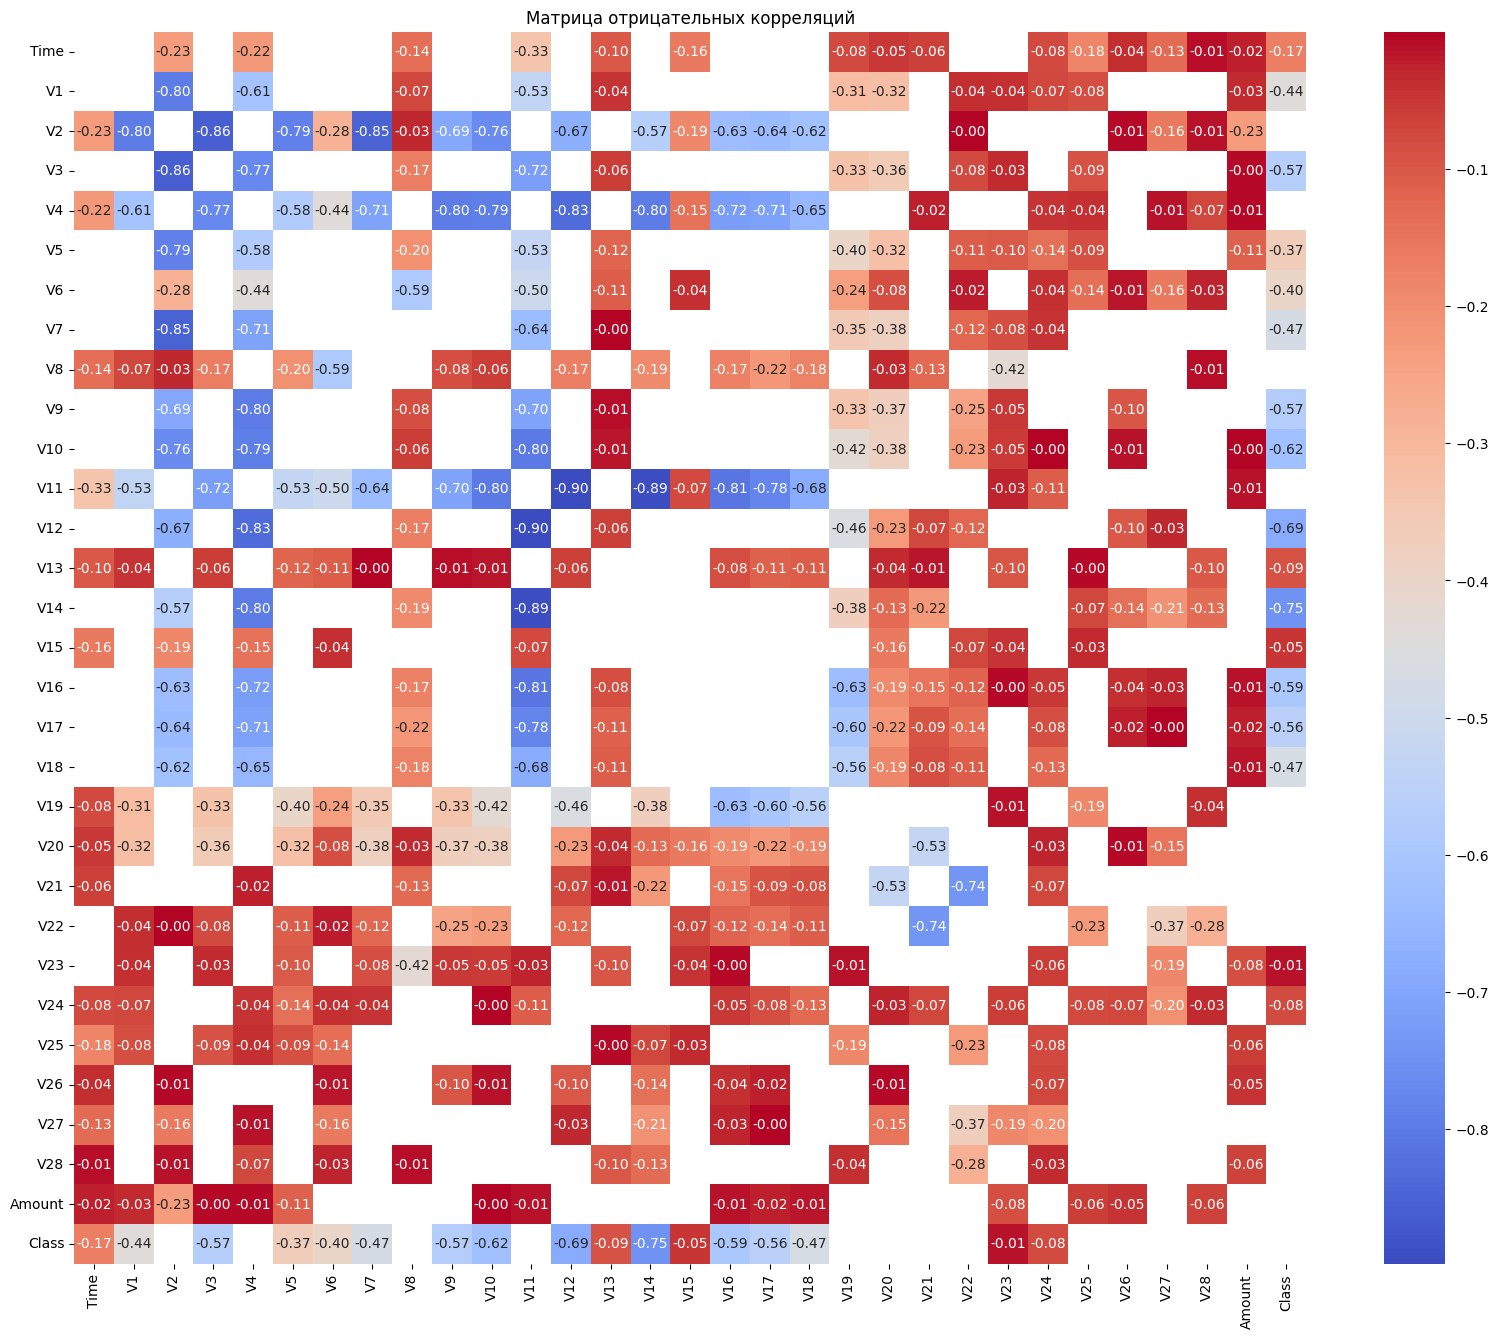

In [20]:
correlation_matrix = new_df.corr()
negative_correlations = correlation_matrix[correlation_matrix < 0]

# Настраиваем график
plt.figure(figsize=(20, 16))

# Строим тепловую карту для визуализации отрицательных корреляций
sns.heatmap(negative_correlations, annot=True, fmt='.2f', cmap='coolwarm', square=True)

# Заголовок графика
plt.title('Матрица отрицательных корреляций')
plt.show()

## Обработка выбросов


In [21]:
def remove_outliers(dataframe, feature, condition_feature):
    # Извлечение значений признака с выбросами
    feature_fraud = dataframe[feature].loc[dataframe[condition_feature] == 1].values

    # Расчёт квартилей и межквартильного размаха
    q25, q75 = np.percentile(feature_fraud, 25), np.percentile(feature_fraud, 75)
    feature_iqr = q75 - q25

    # Определение границ для выбросов
    cut_off = feature_iqr * 1.5
    lower_bound, upper_bound = q25 - cut_off, q75 + cut_off

    # Определение выбросов
    outliers = [x for x in feature_fraud if x < lower_bound or x > upper_bound]

    # Удаление выбросов из основного датафрейма
    dataframe_without_outliers = dataframe.drop(dataframe[(dataframe[feature] > upper_bound) | (dataframe[feature] < lower_bound)].index)

    return dataframe_without_outliers, len(outliers)

features = data.columns[data.columns != 'Class'].tolist()
for feature in features:
  new_df_without_outliers, outlier_count = remove_outliers(new_df, feature, 'Class')
  print('Количество выбросов: {}'.format(outlier_count), feature)

Количество выбросов: 0 Time
Количество выбросов: 52 V1
Количество выбросов: 46 V2
Количество выбросов: 53 V3
Количество выбросов: 0 V4
Количество выбросов: 45 V5
Количество выбросов: 15 V6
Количество выбросов: 30 V7
Количество выбросов: 98 V8
Количество выбросов: 17 V9
Количество выбросов: 19 V10
Количество выбросов: 10 V11
Количество выбросов: 6 V12
Количество выбросов: 0 V13
Количество выбросов: 4 V14
Количество выбросов: 8 V15
Количество выбросов: 0 V16
Количество выбросов: 0 V17
Количество выбросов: 0 V18
Количество выбросов: 5 V19
Количество выбросов: 41 V20
Количество выбросов: 49 V21
Количество выбросов: 24 V22
Количество выбросов: 59 V23
Количество выбросов: 3 V24
Количество выбросов: 36 V25
Количество выбросов: 2 V26
Количество выбросов: 70 V27
Количество выбросов: 46 V28
Количество выбросов: 69 Amount


In [22]:
new_df = new_df_without_outliers

### Понижение размерности и кластеризация


In [23]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Удаление 'Time' и 'Amount'
X.drop(['Time', 'Amount'], axis=1, inplace=True)

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# T-SNE алгоритм
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
t1 = time.time()
print("T-SNE заняло {:.2f} сек".format(t1 - t0))

# PCA алгоритм
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)
t1 = time.time()
print("PCA заняло {:.2f} сек".format(t1 - t0))

# TruncatedSVD алгоритм
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X_scaled)
t1 = time.time()
print("Truncated SVD заняло {:.2f} сек".format(t1 - t0))

T-SNE заняло 8.72 сек
PCA заняло 0.03 сек
Truncated SVD заняло 0.05 сек


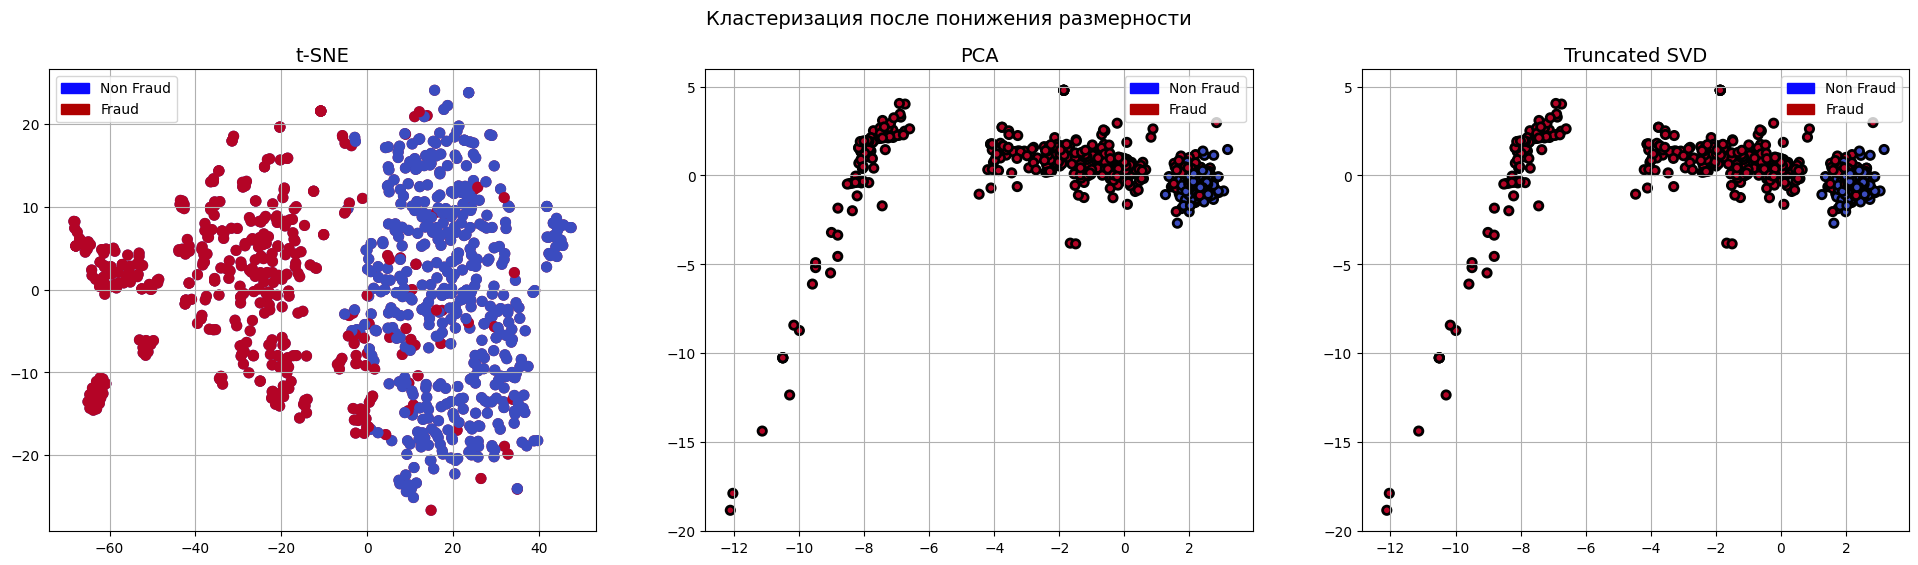

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Кластеризация после понижения размерности', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Non Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, cmap='coolwarm', linewidths=2, edgecolor='k')
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=y, cmap='coolwarm', linewidths=2, edgecolor='k')
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

plt.show()

In [25]:
new_df.to_csv(folder_path + '/creditcard_short.csv')

<h3> Выводы: </h3>
<ul>
<li>Алгоритм t-SNE может довольно точно кластеризовать случаи мошенничества и не мошенничества в нашем наборе данных. </li>
<li> Классы целевой переменной однозначно разделимы, а значит мы можем строить модели! </li>
</ul>